In [1]:
from pypokerengine.utils.card_utils import gen_cards, estimate_hole_card_win_rate, Card, Deck

import numpy as np
import pickle


import matplotlib.pyplot as plt
%matplotlib inline

## Wich nb_simulation is best?

In [3]:
hole_card = gen_cards(['H4', 'D7'])
community_card = gen_cards(['D3', 'C5', 'C6'])

In [19]:
%%time
estimate_hole_card_win_rate(nb_simulation=200, nb_player=9, hole_card=hole_card, community_card=None)

CPU times: user 396 ms, sys: 0 ns, total: 396 ms
Wall time: 400 ms


0.05

In [13]:
%%time
means = []
stds = []

x = list(range(10, 1110, 100))

for i in x:
    res = [estimate_hole_card_win_rate(nb_simulation=i, nb_player=9, hole_card=hole_card,
                                       community_card=None) for j in range(10)]
    means.append(np.mean(res))
    stds.append(np.std(res))

CPU times: user 1min 29s, sys: 0 ns, total: 1min 29s
Wall time: 1min 29s


<Container object of 3 artists>

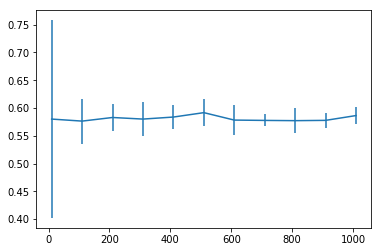

In [6]:
plt.errorbar(x, means, stds)

<Container object of 3 artists>

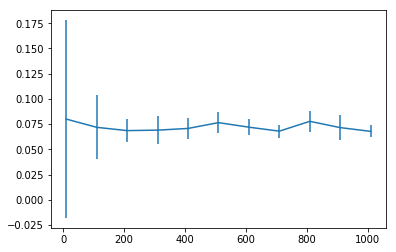

In [14]:
plt.errorbar(x, means, stds)

We see, that 200 is optimal number

## How estimate does depend from nb_player?

In [22]:
%%time
means = []
stds = []

x = list(range(2, 10))

for i in x:
    res = [estimate_hole_card_win_rate(nb_simulation=200, nb_player=i, hole_card=hole_card,
                                       community_card=community_card) for j in range(10)]
    means.append(np.mean(res))
    stds.append(np.std(res))

CPU times: user 12.1 s, sys: 4 ms, total: 12.1 s
Wall time: 12.1 s


<Container object of 3 artists>

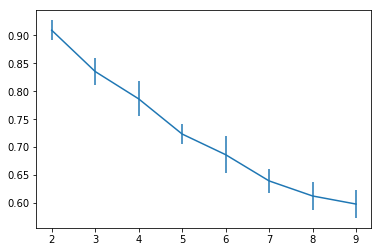

In [23]:
plt.errorbar(x, means, stds)

## Generating hand strength for each combination

In [21]:
suits = list(Card.SUIT_MAP.values())
ranks = list(Card.RANK_MAP.values())

CPU times: user 12.2 s, sys: 0 ns, total: 12.2 s
Wall time: 12.2 s


In [ ]:
%%time
scores = {}

for s1 in suits:
    for r1 in ranks:
        for s2 in suits:
            for r2 in ranks:
                card1 = s1 + r1
                card2 = s2 + r2
                if card1 == card2:
                    continue
                    
                hole1 = (card1, card2)
                hole2 = (card2, card1)
                estimation = estimate_hole_card_win_rate(nb_simulation=10_000, nb_player=9,
                                                         hole_card=gen_cards(hole1))
                scores[hole1] = estimation
                scores[hole2] = estimation

In [ ]:
with open('../cache/hole_card_estimation.pkl', 'wb') as f:
    pickle.dump(scores, f)

In [2]:
with open('../cache/hole_card_estimation.pkl', 'rb') as f:
    s = pickle.load(f)

In [3]:
len(s)

2652

In [8]:
list(s.items())[:5]

[(('C2', 'C3'), 0.0872),
 (('C3', 'C2'), 0.0872),
 (('C2', 'C4'), 0.0931),
 (('C4', 'C2'), 0.0931),
 (('C2', 'C5'), 0.0945)]

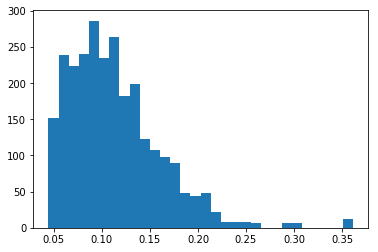

In [9]:
plt.hist(list(s.values()), bins=30);

### The best

In [10]:
sorted(s.items(), key=lambda x: -x[1])[:5]

[(('CA', 'DA'), 0.3612),
 (('DA', 'CA'), 0.3612),
 (('CA', 'HA'), 0.3579),
 (('HA', 'CA'), 0.3579),
 (('CA', 'SA'), 0.3577)]

### The worst

In [11]:
sorted(s.items(), key=lambda x: x[1])[:5]

[(('D2', 'S3'), 0.0443),
 (('S3', 'D2'), 0.0443),
 (('C3', 'H2'), 0.0454),
 (('H2', 'C3'), 0.0454),
 (('C7', 'D2'), 0.0458)]